<IPython.core.display.Javascript object>

Theta: 0.3838003422649103


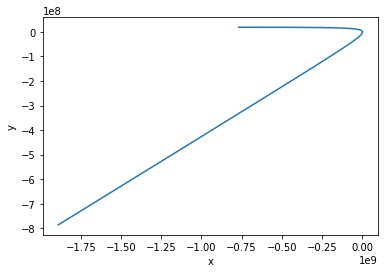

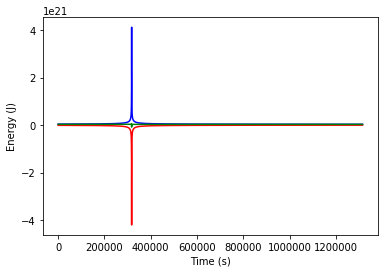

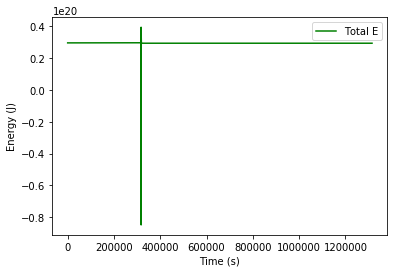

Theta: 1.3978589694225345


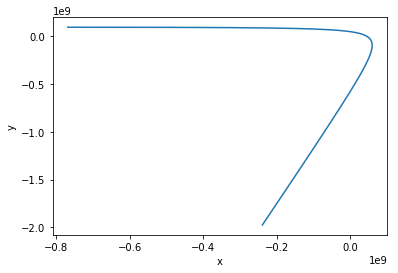

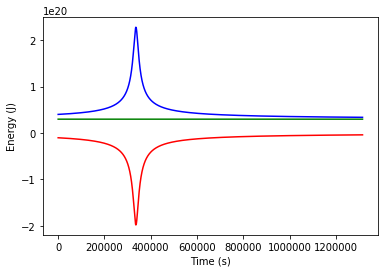

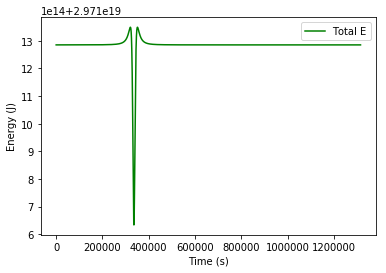

Theta: -0.41616830630032847


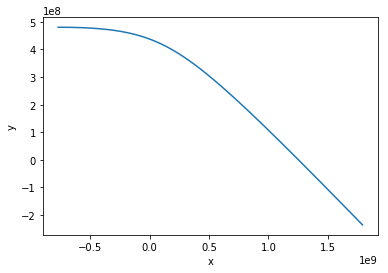

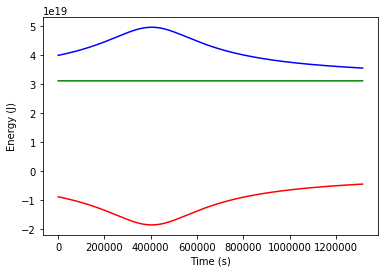

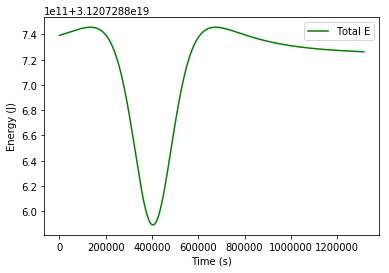

Theta: -0.03864282891382585


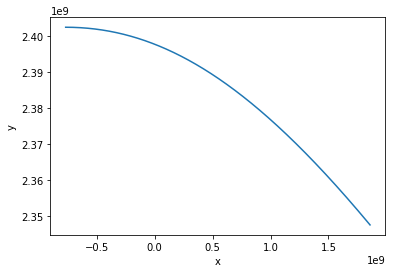

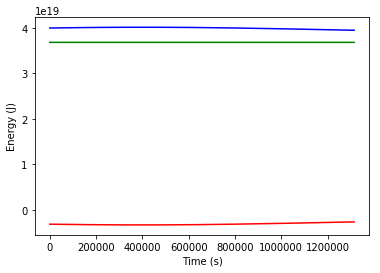

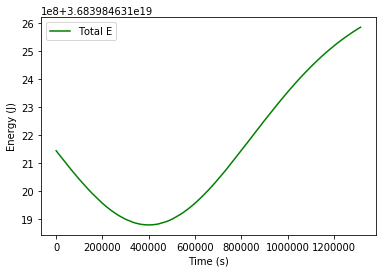

Theta: -0.0018001056162379341


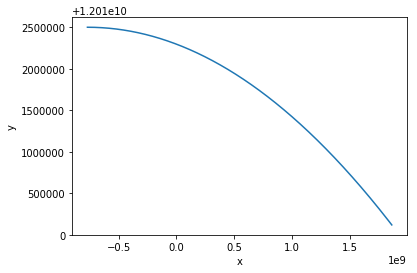

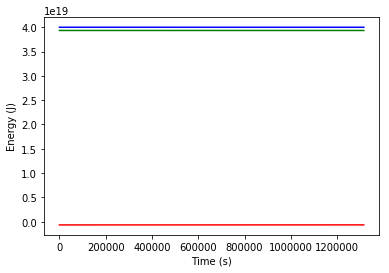

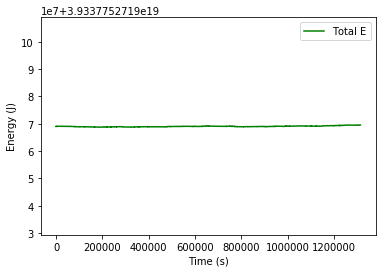

In [34]:
from vpython import *
import numpy as np
from numpy import linspace, pi, array, sqrt, ones, copy, cos, sin
from pylab import plot, show, xlabel, ylabel, legend, figure

'''
Planet is fixed at (0, 0). Firing satellite directly in its path to see behavior.
Will add velocity to planet later. Want to see how close this is to an elastic collision. 
'''

def alpha(r):
    x = r[0]
    y = r[1]
    rcube = sqrt(x**2 + y**2)**3
    
    return array([-G*M*x/rcube, -G*M*y/rcube], float)

# constants
M = 5.972e24
m = 2e13
R = 3.844e8
G = 6.67408e-11
dt = 60

# initial conditions
# [x,y]
r = array([-2*R, 0.01*R], float)  # assume perigee is starting x intercept
# [vx, vy]
v = array([2e3, 0], float)
t = 0

# data
xlist = []
ylist = []
tlist = []
Epotlist = []
Ekinlist = []
Elist = []

# half step
vmid = v + alpha(r)*0.5*dt

# vpython setup
scene = canvas(background = color.white, align="left", center=vector(0,0,0))
earth = sphere(pos=vector(0,0,0), radius=0.2, color=color.blue, make_trail=True)
satellite = sphere(pos=vector(r[0]/R,r[1]/R,0), radius = 0.08, color=color.magenta, make_trail=True)

temp = 0.01*R

# approximated using months -> seconds conversion
for k in range(5):
    temp *= 5
    r = array([-2*R, temp], float)
    v = array([2e3, 0], float)
    t = 0
    xlist = []
    ylist = []
    tlist = []
    Epotlist = []
    Ekinlist = []
    Elist = []
    
    vmid = v + alpha(r)*0.5*dt
    
    while t < 0.5*2629743:
#         rate(1000)

        # unpack for energy
        x, y = r[0], r[1]
        vx, vy = v[0], v[1]
        rmag = sqrt(x**2 + y**2)
        vmag = sqrt(vx**2 + vy**2)

        satellite.pos = vector(r[0]/R, r[1]/R, 0)

        xlist.append(x)
        ylist.append(y)

        U = -G*M*m/rmag
        KE = 0.5*m*vmag**2

        tlist.append(t)
        Epotlist.append(U)
        Ekinlist.append(KE)
        Elist.append(U + KE)

        # verlet method
        r += vmid*dt
        v = vmid + alpha(r)*0.5*dt
        vmid += alpha(r)*dt
        t += dt

    print("Theta: " + str(np.arctan(v[1]/v[0])))
    
    plot(xlist, ylist)
    xlabel("x")
    ylabel("y")
    
    figure()
    plot(tlist, Epotlist, "r-", label="U")
    plot(tlist, Ekinlist, "b-", label="K")
    plot(tlist, Elist, "g-", label="Total E")
    xlabel("Time (s)")
    ylabel('Energy (J)')

    figure()
    plot(tlist, Elist, "g-", label="Total E")
    xlabel("Time (s)")
    ylabel('Energy (J)')
    legend()
    show()